In [11]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline



mglearn.plots.plot_logistic_regression_graph()


ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print('Accuracy on training subset: {:.3f}'.format(mlp.score(X_train, y_train)))
print('Accuracy on test subset: {:.3f}'.format(mlp.score(X_test, y_test)))


Accuracy on training subset: 0.906
Accuracy on test subset: 0.881


In [4]:
print('The maximum per each feature:\n{}'.format(cancer.data.max(axis=0)))

The maximum per each feature:
[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   1.05800000e+00   1.25200000e+00   2.91000000e-01
   6.63800000e-01   2.07500000e-01]


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)

mlp = MLPClassifier(max_iter=1000,random_state=42)
mlp.fit(X_train_scaled,y_train)

print('Accuracy on training subset: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy on test subset: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy on training subset: 0.995
Accuracy on test subset: 0.958


In [6]:
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [9]:
mlp = MLPClassifier(max_iter=1000,alpha=1,random_state=42)
mlp.fit(X_train_scaled,y_train)

print('Accuracy on training subset: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy on test subset: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy on training subset: 0.988
Accuracy on test subset: 0.972


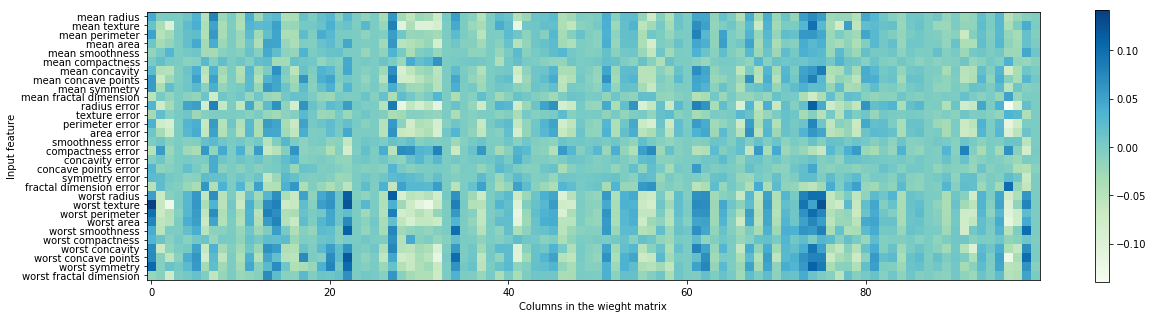

In [12]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='None',cmap='GnBu')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel('Columns in the wieght matrix')
plt.ylabel('Input feature')
plt.colorbar()